In [1]:
%matplotlib notebook

In [2]:
def tutte_barycentric_layout(graph, h):
    import numpy as np
    l = len(graph)
    W = np.zeros(shape=(l, l), dtype='float')
    F = np.array([[np.cos(j*2*np.pi / h), -np.sin(j*2*np.pi / h)] for j in range(h)])
    for i, neighbors in graph.iteritems():
        for j in graph.keys():
            if i == j:
                W[i, j] = len(neighbors)   
            else:
                W[i, j] = -1.0 if j in neighbors else 0.0
    B = np.matmul(W,np.pad(F, (0, l-h), 'constant'))
    return np.concatenate((F, np.linalg.solve(W[h:,h:], -B[h:,0:2])))

In [3]:
import matplotlib
from matplotlib import pyplot as plt

In [4]:
graph = {
    0: [1, 8, 4], 
    1: [0, 2, 5], 
    2: [1, 3, 47], 
    3: [2, 4, 20], 
    4: [0, 37, 3], 
    5: [15, 6, 1], 
    6: [5, 13, 7], 
    7: [8, 6, 12], 
    8: [0, 7, 23], 
    9: [29, 10, 53], 
    10: [9, 56, 11], 
    11: [10, 43, 36], 
    12: [46, 7, 40], 
    13: [19, 45, 6], 
    14: [15, 47, 49], 
    15: [19, 5, 14], 
    16: [57, 51, 17], 
    17: [16, 48, 18], 
    18: [58, 50, 17], 
    19: [15, 32, 13], 
    20: [21, 3, 39], 
    21: [22, 20, 31], 
    22: [21, 57, 47], 
    23: [8, 46, 27], 
    24: [52, 25, 46], 
    25: [35, 26, 24], 
    26: [25, 54, 27], 
    27: [37, 23, 26], 
    28: [34, 29, 41], 
    29: [28, 59, 9], 
    30: [39, 42, 31], 
    31: [21, 30, 51], 
    32: [50, 33, 19], 
    33: [32, 58, 34], 
    34: [33, 28, 45], 
    35: [25, 53, 36], 
    36: [11, 55, 35], 
    37: [38, 4, 27], 
    38: [37, 54, 39], 
    39: [38, 30, 20], 
    40: [41, 12, 45], 
    41: [40, 28, 52], 
    42: [30, 55, 43], 
    43: [11, 44, 42], 
    44: [43, 48, 51], 
    45: [34, 40, 13], 
    46: [23, 12, 24], 
    47: [22, 14, 2], 
    48: [17, 44, 56], 
    49: [14, 57, 50], 
    50: [49, 18, 32], 
    51: [16, 31, 44], 
    52: [41, 53, 24], 
    53: [9, 35, 52], 
    54: [26, 55, 38], 
    55: [42, 54, 36], 
    56: [10, 59, 48], 
    57: [22, 16, 49], 
    58: [33, 18, 59], 
    59: [58, 56, 29]
}

In [ ]:
graph = {
    0: [1, 8, 4], 
    1: [0, 2, 5], 
    2: [1, 3, 47], 
    3: [2, 4, 20], 
    4: [0, 37, 3], 
    5: [15, 6, 1], 
    6: [5, 13, 7], 
    7: [8, 6, 12], 
    8: [0, 7, 23], 
    9: [29, 10, 53], 
    10: [9, 56, 11], 
    11: [10, 43, 36], 
    12: [46, 7, 40], 
    13: [19, 45, 6], 
    14: [15, 47, 49], 
    15: [19, 5, 14], 
    16: [57, 51, 17], 
    17: [16, 48, 18], 
    18: [58, 50, 17], 
    19: [15, 32, 13], 
    20: [21, 3, 39], 
    21: [22, 20, 31], 
    22: [21, 57, 47], 
    23: [8, 46, 27], 
    24: [52, 25, 46], 
    25: [35, 26, 24], 
    26: [25, 54, 27], 
    27: [37, 23, 26], 
    28: [34, 29, 41], 
    29: [28, 59, 9], 
    30: [39, 42, 31], 
    31: [21, 30, 51], 
    32: [50, 33, 19], 
    33: [32, 58, 34], 
    34: [33, 28, 45], 
    35: [25, 53, 36], 
    36: [11, 55, 35], 
    37: [38, 4, 27], 
    38: [37, 54, 39], 
    39: [38, 30, 20], 
    40: [41, 12, 45], 
    41: [40, 28, 52], 
    42: [30, 55, 43], 
    43: [11, 44, 42], 
    44: [43, 48, 51], 
    45: [34, 40, 13], 
    46: [23, 12, 24], 
    47: [22, 14, 2], 
    48: [17, 44, 56], 
    49: [14, 57, 50], 
    50: [49, 18, 32], 
    51: [16, 31, 44], 
    52: [41, 53, 24], 
    53: [9, 35, 52], 
    54: [26, 55, 38], 
    55: [42, 54, 36], 
    56: [10, 59, 48], 
    57: [22, 16, 49], 
    58: [33, 18, 59], 
    59: [58, 56, 29]
}

In [5]:
P = tutte_barycentric_layout(graph, 5)

In [6]:
P.shape

(60, 2)

In [7]:
from itertools import chain
edges = list(chain(*[[(a, b) for b in mems] for a, mems in graph.iteritems()]))

In [8]:
import numpy as np

In [9]:
def normalize(V):
    norm = np.linalg.norm(V)
    return V / norm if norm > 0 else V

In [10]:
def normalize_all(V):
    normalizer = np.linalg.norm(V, axis=1)
    normalizer[normalizer == 0] = 1
    return V / np.expand_dims(normalizer, 1)

In [11]:
def generation(graph, vectors):
    next_gen = {}
    l = len(vectors)
    for i in range(l):
        neigbors = graph.get(i)
        v = vectors[i, :]
        n1 = vectors[neigbors[0], :]-v
        n2 = vectors[neigbors[1], :]-v
        n3 = vectors[neigbors[2], :]-v
        next_vec = v
        for j in range(l):
            next_vec = next_vec + (vectors[j, :] - v) / 3
        for j in neigbors:
            next_vec = next_vec - (vectors[j, :] - v) / 10
        next_gen[i] = next_vec
    next_gen_mat = np.array([next_gen[i] for i in range(l)]).reshape((l,3))
    next_gen_mat = normalize_all(next_gen_mat)
    return next_gen_mat

In [12]:
vectors = np.concatenate((P, np.expand_dims(np.sqrt(1 - (P[:, 0] * P[:, 0] + P[:, 1] * P[:, 1]) ), 1)), axis=1)
normals = normalize_all(np.random.normal(size=(len(graph), 3))) / 4

<IPython.core.display.Javascript object>


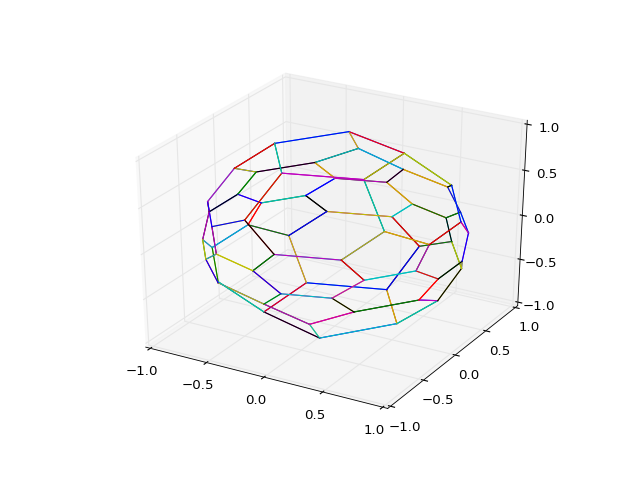

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cursor = vectors
for i in range(100):
    cursor = generation(graph, cursor)
for (a, b) in edges:
    plt.plot(cursor[[a,b],0],cursor[[a,b],1],cursor[[a,b],2])
plt.show()

In [43]:
P[:, 0] * P[:, 0] + P[:, 1] * P[:, 1]
1.0-(P[:, 0] * P[:, 0] + P[:, 1] * P[:, 1])

array([  0.00000000e+00,   1.11022302e-16,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   6.85997146e-01,
         8.71609081e-01,   8.71609081e-01,   6.85997146e-01,
         9.98724324e-01,   9.98724324e-01,   9.92762118e-01,
         9.35469191e-01,   9.35469191e-01,   8.71609081e-01,
         8.71609081e-01,   9.69885360e-01,   9.86090913e-01,
         9.86090913e-01,   9.35469191e-01,   6.85997146e-01,
         8.71609081e-01,   8.71609081e-01,   8.71609081e-01,
         9.69885360e-01,   9.69885360e-01,   9.35469191e-01,
         8.71609081e-01,   9.92762118e-01,   9.98724324e-01,
         9.35469191e-01,   9.35469191e-01,   9.69885360e-01,
         9.86090913e-01,   9.86090913e-01,   9.86090913e-01,
         9.86090913e-01,   6.85997146e-01,   8.71609081e-01,
         8.71609081e-01,   9.69885360e-01,   9.86090913e-01,
         9.69885360e-01,   9.86090913e-01,   9.86090913e-01,
         9.69885360e-01,   9.35469191e-01,   6.85997146e-01,
         9.92762118e-01,

In [77]:
(S,V,D) = np.linalg.svd(cursor)


In [78]:
V

array([  2.93160397e-04,   1.57581384e-04,   1.85223647e-05])

In [70]:
V

array([ 0.01722233,  0.00925745,  0.00108814])

In [71]:
V[1:] - V[0:1]

array([-0.00796488, -0.01613419])

In [82]:
(S, V, D)

(array([[ 0.00940548,  0.10948352, -0.19474316, ..., -0.1560855 ,
          0.09660519,  0.13353669],
        [ 0.0780199 ,  0.14176645, -0.15432166, ..., -0.10673879,
         -0.11235229, -0.0242868 ],
        [ 0.05012586,  0.1964904 , -0.09422815, ...,  0.11610626,
          0.17246868,  0.18270649],
        ..., 
        [ 0.09008384,  0.16193877,  0.12514278, ...,  0.94678015,
         -0.01858621, -0.0046614 ],
        [ 0.14153943, -0.09014227,  0.14778685, ..., -0.02216641,
          0.95277265, -0.03931332],
        [ 0.06089461, -0.14425553,  0.15963136, ..., -0.00862363,
         -0.04159376,  0.95826245]]),
 array([  2.93160397e-04,   1.57581384e-04,   1.85223647e-05]),
 array([[ 0.03015159, -0.99901884, -0.03243831],
        [-0.6035868 , -0.04406578,  0.79607863],
        [-0.79672697, -0.0044237 , -0.60432323]]))

In [87]:
cursor.mean(axis=0)

array([  3.10578747e-22,   2.25875453e-21,   1.80700362e-21])

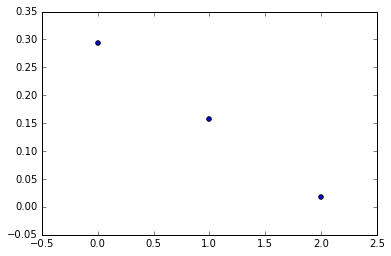

In [93]:
plt.scatter([0, 1, 2], (V*1000).tolist())

In [95]:
S.shape

(60, 60)

In [96]:
V[-1]

1.8522364711182939e-05

In [97]:
V[0]

0.00029316039671689229

In [170]:
np.array([[1, 2], [2, 3]]) / np.array([[2], [2]], dtype="float")

array([[ 0.5,  1. ],
       [ 1. ,  1.5]])

In [179]:
np.expand_dims?